# **INSTALL AND IMPORT NECESSARY PACKAGES**

In [1]:
# !pip install pickle5
# !pip install ImageHash
!pip install --no-input faiss-gpu
!pip install --no-input ultralytics
!pip install --no-input transformers 
# !pip install scenedetect
!pip install --no-input joblib
!pip install --no-input opencv-python
# !conda install opencv -y

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 11.5 MB/s eta 0:00:00
  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/f4/79/b192c64e13eefc7f8543a10080767ab057850fa9bdbc38e7c261a3432c93/ultralytics-8.0.227-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 21.5 MB/s eta 0:00:00


In [2]:
import time
import faiss
# import pickle
import cv2 as cv
# import imagehash
from transformers import AutoImageProcessor, Dinov2Model
from datasets import load_dataset
from ultralytics.utils.plotting import Annotator
from ultralytics import YOLO
from PIL import Image
# from numpy.linalg import norm
# from google.colab.patches import cv2_imshow
# from google.colab import drive
# from scenedetect import detect, AdaptiveDetector, split_video_ffmpeg
import os
import torch
import numpy as np
import pandas as pd
import tensorflow as tf
import gc
from joblib import load, dump
import matplotlib.pyplot as plt
# drive.mount('/content/drive')

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
yolo_model = YOLO('yolov8l.pt')

100%|██████████| 83.7M/83.7M [00:00<00:00, 225MB/s]


In [5]:
def yolo_draw_bounding_boxes(image):
    lst_of_persons = []
    results = yolo_model.predict(image, verbose=False, conf=0.5)
    for r in results:
        boxes = r.boxes
        for box in boxes:
            b = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
            b = b.cpu().numpy().astype(int)
            top, left, bottom, right = b
            # print(f'bounding box: {b}')
            c = box.cls
            person_img = image[left:right, top:bottom]
            label = yolo_model.names[int(c)]
            if label == "person":
                # label = yolo_model.names[int(c)]
                # print(coordinates)
                lst_of_persons.append(person_img)
    return lst_of_persons

# **EXTARCT AND SAVE FEATURES TO FAISS DATABASE**

In [6]:
image_processor = AutoImageProcessor.from_pretrained("facebook/dinov2-small")
dino = Dinov2Model.from_pretrained("facebook/dinov2-small")

In [7]:
# data_folder = "/content/drive/MyDrive/Colab Notebooks/DINOv2_ArcFace/TRECVID_MSUM_2022"
# kiya_path = "/content/drive/MyDrive/Colab Notebooks/DINOv2_ArcFace/TRECVID_MSUM_2022/query/like_me/Kiya"
# movie_path = "../input/movie-frames-2/Calloused_Hands/Calloused_Hands"
# frame_features = []
# db = {"person_count": [], "shot": []}
# person_count = 0

In [8]:
# for scene in sorted(os.listdir(movie_path), key=lambda x: int(x.split("-")[1])):
#     for shot in sorted(os.listdir(movie_path+"/"+scene), key=lambda x: int(x.split("-")[2].split("_")[1])):
#         for frame in sorted(os.listdir(movie_path+"/"+scene+"/"+shot), key=lambda x: int(x.split("_")[3].split(".")[0])):
#             if type(frame) == None:
#                 continue
#             print(frame)
#             frame_img = cv.imread(movie_path+"/"+scene+"/"+shot+"/"+frame)
#             if type(frame_img) == None:
#                 continue
#             frame_persons = yolo_draw_bounding_boxes(frame_img)
#             if frame_persons == []:
#                 continue
#             inputs = image_processor(frame_persons, return_tensors="pt")
#             with torch.no_grad():
#                 embeddings = dino(**inputs).last_hidden_state
#                 embeddings = embeddings.mean(axis=1)
#                 vectors = embeddings.detach().cpu().numpy()
#                 vectors = np.float32(vectors)
#                # vectors = np.reshape(vectors, (1, -1))
#                # faiss.normalize_L2(vectors)
#                 for i in vectors:
#                     tempt = np.reshape(i, (1, -1))
#                     print(tempt.shape)
#                     frame_features.append(tempt)
#                     db["person_count"].append(person_count)
#                     db["shot"].append(shot)
#                     person_count += 1
#             torch.cuda.empty_cache()
#             gc.collect()

In [9]:
# db = pd.DataFrame(db)
# db.to_csv("calloused_hands-persons.csv", index=False)

In [10]:
# frame_features = np.array(frame_features)
# frame_features = np.reshape(frame_features, (frame_features.shape[0], frame_features.shape[2]))
# faiss.normalize_L2(frame_features)

In [11]:
# dump(frame_features, "calloused_hands-frame_features.joblib")
# frame_features = load("../input/movie-features/calloused_hands-frame_features.joblib")

In [12]:
# l2_index = faiss.IndexFlatL2(384)
# res = faiss.StandardGpuResources() # declare a GPU resource
# l2_index = faiss.index_cpu_to_gpu(res, 0, l2_cpu)

In [13]:
# l2_index.add(frame_features)
# faiss.write_index(l2_index, "calloused_hands-index-l2.index")

In [14]:
# l2_ip = faiss.IndexFlatIP(384)
# l2_ip.add(frame_features)
# faiss.write_index(l2_ip, "like_me-index-ip.index")

# **CARRYING OUT SOME RETRIEVALS**

In [15]:
all_persons = pd.read_csv("../input/all-persons/Calloused_Hands_db.csv")
ground_truth = set(pd.read_excel("../input/ground-truth/ground_truth/Calloused_Hands/Byrd.xlsx")["Full"])
all_persons.head(5)

,Person,Shot,Scene,Full
0,0,1,1,Calloused_Hands-1-shot_1
1,1,1,1,Calloused_Hands-1-shot_1
2,2,1,1,Calloused_Hands-1-shot_1
3,3,1,1,Calloused_Hands-1-shot_1
4,4,1,1,Calloused_Hands-1-shot_1


In [16]:
index = faiss.read_index("../input/movie-index/calloused_hands-index.index")

In [17]:
query_features = []
for img_name in os.listdir("../input/movie-query/Calloused_Hands/Calloused_Hands/Byrd"):
    # if img_name == "like_me-index.index": continue
   # print(img_name)
    img = cv.imread(f"../input/movie-query/Calloused_Hands/Calloused_Hands/Byrd/{img_name}")
    person = yolo_draw_bounding_boxes(img)
    if person == []: continue
    inputs = image_processor(person, return_tensors="pt")
    with torch.no_grad():
        embeddings = dino(**inputs).last_hidden_state
        embeddings = embeddings.mean(axis=1)
        vectors = embeddings.detach().cpu().numpy()
        vectors = np.float32(vectors)
       # vectors = np.reshape(vectors, (1, -1))
       # faiss.normalize_L2(vectors)
        for i in vectors:
            tempt = np.reshape(i, (1, -1))
           # print(tempt.shape)
            query_features.append(tempt)

In [18]:
query_features = np.array(query_features)
query_features = np.reshape(query_features, (query_features.shape[0], query_features.shape[2]))
faiss.normalize_L2(query_features)

In [19]:
precision_lst = []
recall_lst = []
k_lst = [i for i in range(1, len(all_persons))]

In [20]:
for k in k_lst:
    D, I = index.search(query_features, k)
    search_results = set()
    for query in I:
        query_set = set(query)
        search_results.update(query_set)
    if -1 in search_results:
        search_results.remove(-1)
    retrieved_shots = set()
    for i in search_results:
        retrieved_shots.add(all_persons["Full"][i])
    relevant_retrieved_shots = retrieved_shots & ground_truth
    precision = len(relevant_retrieved_shots)/len(retrieved_shots)
    recall = len(relevant_retrieved_shots)/len(ground_truth)
    precision_lst.append(precision)
    recall_lst.append(recall)

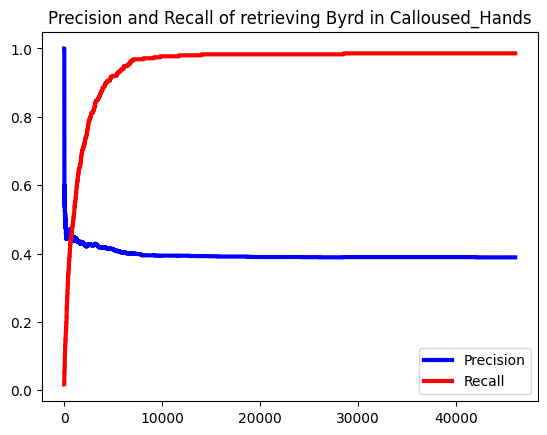

In [21]:
plt.plot(k_lst, precision_lst, linewidth=3, color="blue", label = "Precision") 
plt.plot(k_lst, recall_lst, linewidth=3, color="red", label = "Recall") 
plt.title("Precision and Recall of retrieving Byrd in Calloused_Hands") 
plt.legend() 
plt.show()

# **EVALUATION OF PRECISION AND RECALL**

In [22]:
# ground_truth = set(pd.read_excel("../input/ground-truth/ground_truth/Liberty_Kid/Derrick.xlsx")["Full"])
# print(ground_truth)

In [23]:
# relevant_retrieved_shots = retrieved_shots & ground_truth
# precision = len(relevant_retrieved_shots)/len(retrieved_shots)
# recall = len(relevant_retrieved_shots)/len(ground_truth)

In [24]:
# print("Precision: {:.2f}".format(precision))
# print("Recall: {:.2f}".format(recall))

# **DEAL WITH PICKLE FEATURES ^_^**

In [25]:
# with open('../input/pickle-features/like_me/0_like_me-1-shot_1.pkl','rb') as f:
#     feature_vector = pickle.load(f)

In [26]:
# feature_vectors = []
# for file in sorted(os.listdir("../input/pickle-features/losing_ground/losing_ground"), key=lambda x: int(x.split("_")[0])):
#     with open(f'../input/pickle-features/losing_ground/losing_ground/{file}','rb') as f:
#         feature_vector = pickle.load(f)
#         feature_vector = feature_vector.numpy().astype(np.float32).flatten().reshape(1, -1)
#         feature_vectors.append(feature_vector)

In [27]:
# feature_vectors = np.array(feature_vectors)
# print(feature_vectors.shape)

In [28]:
# feature_vectors = np.reshape(feature_vectors, (feature_vectors.shape[0], feature_vectors.shape[2]))

In [29]:
# feature_vectors = load("../input/movie-features/like_me-features.joblib")

In [30]:
# feature_vectors = np.reshape(feature_vectors, (feature_vectors.shape[0], feature_vectors.shape[2]))

In [31]:
# quantizer = faiss.index_factory(feature_vectors.shape[1], "Flat", faiss.METRIC_INNER_PRODUCT)
# cpu_index = faiss.IndexIVFPQ(quantizer, feature_vectors.shape[1], 500 ,48, 8, faiss.METRIC_INNER_PRODUCT)

In [32]:
# res = faiss.StandardGpuResources() # declare a GPU resource
# gpu_index = faiss.index_cpu_to_gpu(res, 0, cpu_index)

In [33]:
# gpu_index.train(feature_vectors)
# gpu_index.add(feature_vectors)

In [34]:
# final_index = faiss.index_gpu_to_cpu(gpu_index)

In [35]:
# faiss.write_index(cpu_index, "like_me-index.index")

In [36]:
# quantizer = faiss.index_factory(75648, "Flat", faiss.METRIC_INNER_PRODUCT)
# index = faiss.IndexIVFPQ(quantizer, 75648, 100 ,48, 8, faiss.METRIC_INNER_PRODUCT)

In [37]:
# res = faiss.StandardGpuResources() # declare a GPU resource
# gpu_index = faiss.index_cpu_to_gpu(res, 0, index)

In [38]:
# faiss.compute_nprobe(x)

In [39]:
# gpu_index.train(x)

In [40]:
# gpu_index.add(x)

In [41]:
# faiss.normalize_L2(q)
# distance, indices = gpu_index.search(q, 15)
# print('Distance by FAISS:{}'.format(distance))